In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = r"C:\Users\Shivani\Downloads\1730285881-Airbnb_Open_Data.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("✅ Columns standardized:\n", df.columns.tolist())


df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df["last_review"] = df["last_review"].fillna("No Review")

✅ Columns standardized:
 ['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']



Q1️⃣: Property Type (Room Type) Distribution:
room_type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


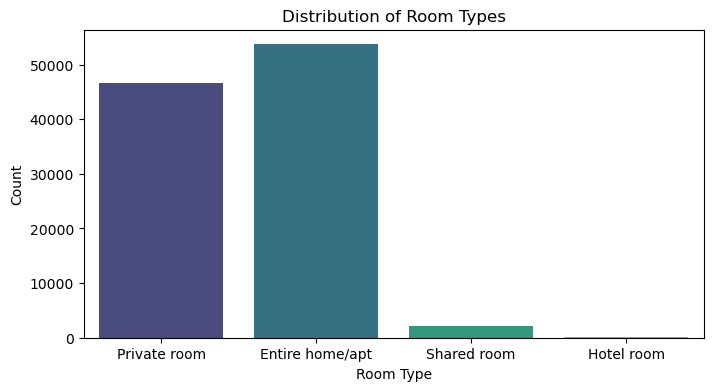

In [4]:

print("\nQ1️⃣: Property Type (Room Type) Distribution:")
print(df["room_type"].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x="room_type", data=df, palette="viridis")
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()


Q2️⃣: Listings by Neighbourhood Group:
neighbourhood_group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64


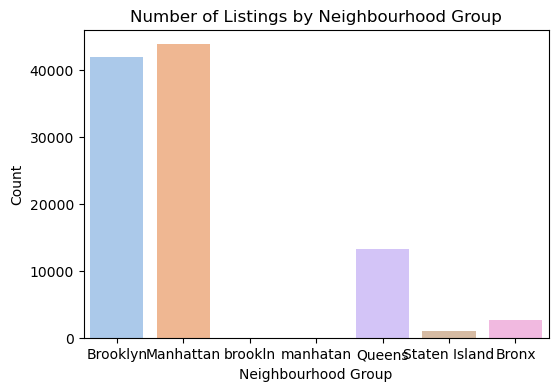

In [5]:
print("\nQ2️⃣: Listings by Neighbourhood Group:")
ng_counts = df["neighbourhood_group"].value_counts()
print(ng_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x="neighbourhood_group", data=df, palette="pastel")
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()


Q3️⃣: Average Price by Neighbourhood Group:
 neighbourhood_group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


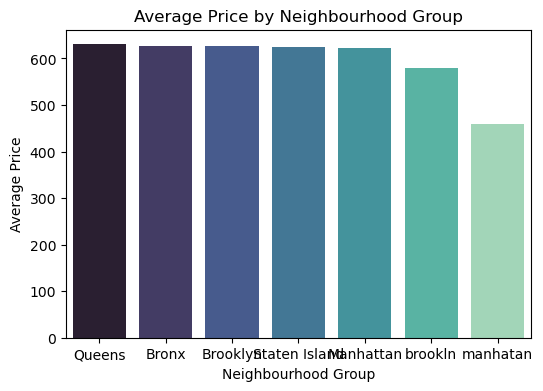

In [6]:
avg_price_ng = df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)
print("\nQ3️⃣: Average Price by Neighbourhood Group:\n", avg_price_ng)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_price_ng.index, y=avg_price_ng.values, palette="mako")
plt.title("Average Price by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.show()


Q4️⃣: Relationship between Construction Year and Price


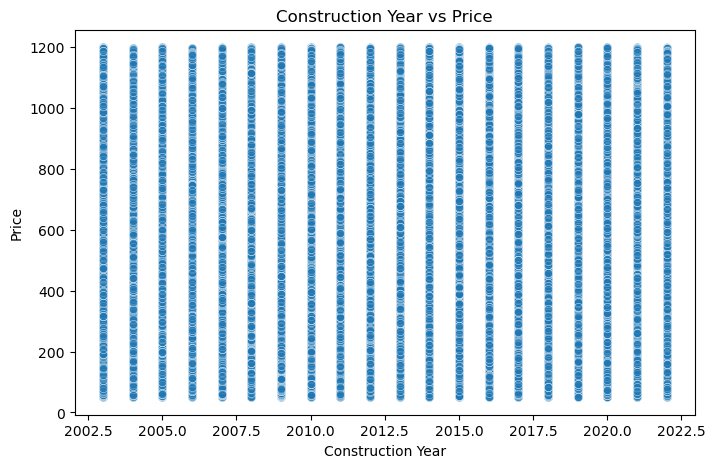

In [7]:
print("\nQ4️⃣: Relationship between Construction Year and Price")

plt.figure(figsize=(8, 5))
sns.scatterplot(x="construction_year", y="price", data=df, alpha=0.6)
plt.title("Construction Year vs Price")
plt.xlabel("Construction Year")
plt.ylabel("Price")
plt.show()

corr_year_price = df[["construction_year", "price"]].corr().iloc[0, 1]


Q5️⃣: Top 10 Hosts by Listing Count:
 host_name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated_host_listings_count, dtype: float64


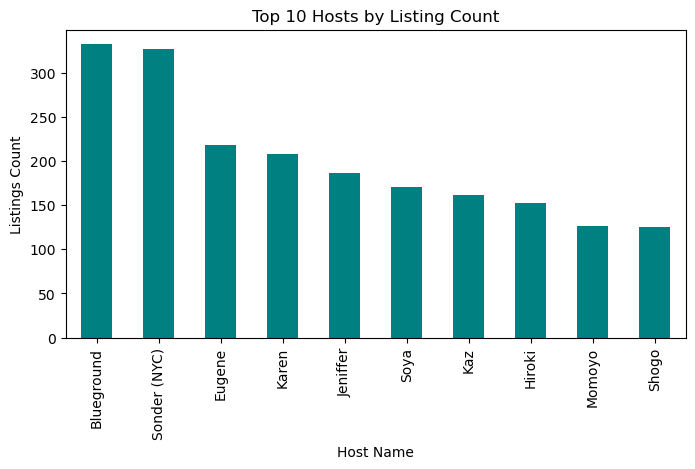

In [8]:
top_hosts = (
    df.groupby("host_name")["calculated_host_listings_count"]
    .max()
    .sort_values(ascending=False)
    .head(10)
)
print("\nQ5️⃣: Top 10 Hosts by Listing Count:\n", top_hosts)

plt.figure(figsize=(8, 4))
top_hosts.plot(kind="bar", color="teal")
plt.title("Top 10 Hosts by Listing Count")
plt.xlabel("Host Name")
plt.ylabel("Listings Count")
plt.show()


Q6️⃣: Verified Hosts vs Review Rate Number
host_identity_verified
unconfirmed    3.271767
verified       3.286684
Name: review_rate_number, dtype: float64


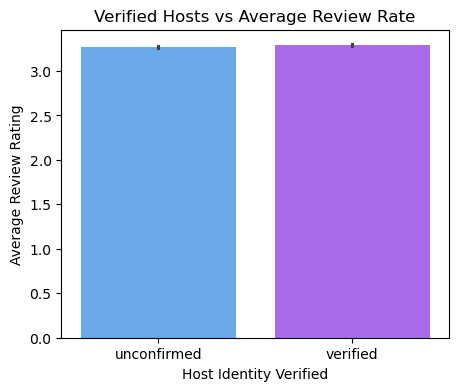

In [9]:
print("\nQ6️⃣: Verified Hosts vs Review Rate Number")

verified_avg = df.groupby("host_identity_verified")["review_rate_number"].mean()
print(verified_avg)

plt.figure(figsize=(5, 4))
sns.barplot(x="host_identity_verified", y="review_rate_number", data=df, palette="cool")
plt.title("Verified Hosts vs Average Review Rate")
plt.xlabel("Host Identity Verified")
plt.ylabel("Average Review Rating")
plt.show()


Q7️⃣: Correlation between Price and Service Fee


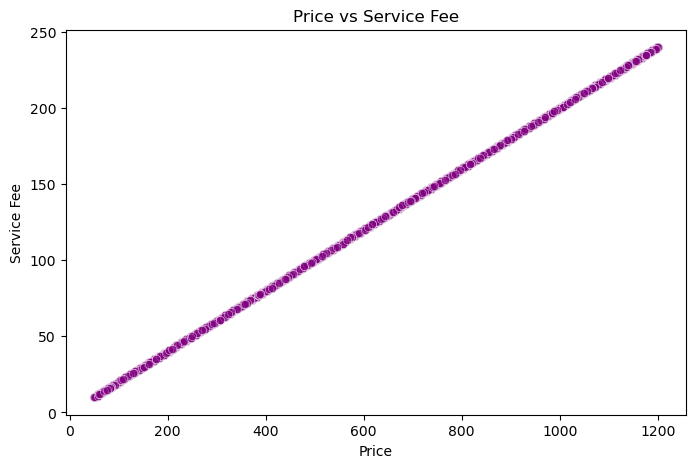

Correlation between price and service fee: 1.00


In [10]:
print("\nQ7️⃣: Correlation between Price and Service Fee")

plt.figure(figsize=(8, 5))
sns.scatterplot(x="price", y="service_fee", data=df, alpha=0.6, color="purple")
plt.title("Price vs Service Fee")
plt.xlabel("Price")
plt.ylabel("Service Fee")
plt.show()

corr_price_service = df[["price", "service_fee"]].corr().iloc[0, 1]
print(f"Correlation between price and service fee: {corr_price_service:.2f}")




Q8️⃣: Average Review Rate by Neighbourhood Group and Room Type
room_type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_group                                                        
Bronx                       3.346457         NaN      3.329706     3.264957
Brooklyn                    3.250378        3.75      3.264465     3.336983
Manhattan                   3.275807        3.50      3.277576     3.257459
Queens                      3.349154        3.75      3.315585     3.377778
Staten Island               3.329087         NaN      3.479482     3.533333
brookln                          NaN         NaN      4.000000          NaN
manhatan                         NaN         NaN      3.000000          NaN


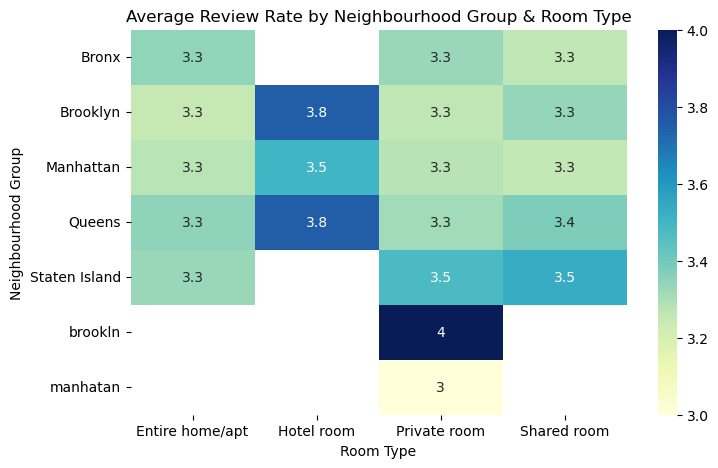

In [11]:
print("\nQ8️⃣: Average Review Rate by Neighbourhood Group and Room Type")

avg_review = (
    df.groupby(["neighbourhood_group", "room_type"])["review_rate_number"]
    .mean()
    .unstack()
)
print(avg_review)

plt.figure(figsize=(8, 5))
sns.heatmap(avg_review, annot=True, cmap="YlGnBu")
plt.title("Average Review Rate by Neighbourhood Group & Room Type")
plt.xlabel("Room Type")
plt.ylabel("Neighbourhood Group")
plt.show()


Q9️⃣: Host Listing Count vs Availability (365 Days)


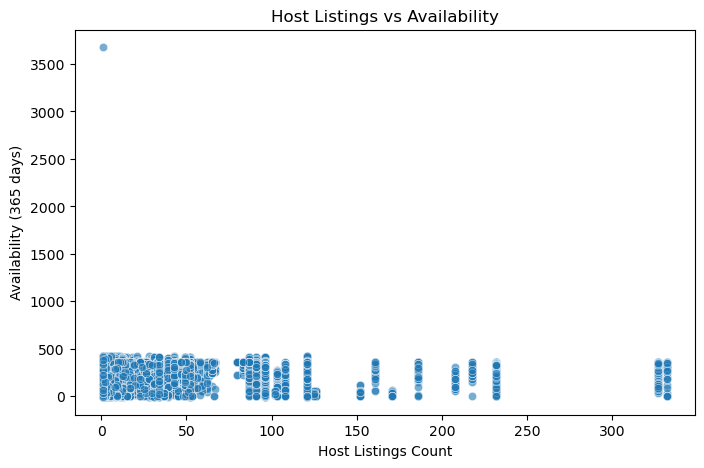

Correlation between host listing count and availability: 0.16


In [12]:
print("\nQ9️⃣: Host Listing Count vs Availability (365 Days)")

plt.figure(figsize=(8, 5))
sns.scatterplot(x="calculated_host_listings_count", y="availability_365", data=df, alpha=0.6)
plt.title("Host Listings vs Availability")
plt.xlabel("Host Listings Count")
plt.ylabel("Availability (365 days)")
plt.show()

corr_avail = df[["calculated_host_listings_count", "availability_365"]].corr().iloc[0, 1]
print(f"Correlation between host listing count and availability: {corr_avail:.2f}")